In [1]:
import pickle
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform as sp_loguniform
from sklearn.metrics import roc_auc_score, average_precision_score

In [10]:
vectorizers = ['count', 'tfidf', 'hashing', 'binary', 'hashing_binary']

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
    
    lr = LogisticRegression(random_state=0)
    
    params = {'C': sp_loguniform(1e-10, 1e4),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=20,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='roc_auc',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, train_labels)
    predicted = cv[vectorizer].predict(dev)
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC: {roc_auc_score(dev_labels, predicted)}')
    print(f'AP: {average_precision_score(dev_labels, predicted)}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 15.1min finished


Vectorizer: count
ROC: 0.6793121632715193
AP: 0.1542325970164089
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 12.0min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: tfidf
ROC: 0.6927242268496622
AP: 0.16676491464105941
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:   43.4s
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:  4.8min finished


Vectorizer: hashing
ROC: 0.667750458372069
AP: 0.1475686148987282
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 15.1min finished


Vectorizer: binary
ROC: 0.6792179829318415
AP: 0.1541160861591423
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:  4.6min finished


Vectorizer: hashing_binary
ROC: 0.6644179337307476
AP: 0.14607753082311264


In [11]:
results = pd.DataFrame.from_dict(cv['count'].cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,98.848432,5.253069,0.077023,0.004961,0.0048238,{'C': 0.004823797354254945},0.731751,0.715614,0.731568,0.726311,0.007564,9,0.866374,0.868059,0.865609,0.866680,0.001024
1,129.267354,1.017002,0.065011,0.004965,1.02956,{'C': 1.0295587388218506},0.672920,0.656138,0.675052,0.668037,0.008459,13,0.999599,0.999689,0.999664,0.999651,0.000038
2,129.225668,1.417217,0.074017,0.027802,0.0274592,{'C': 0.027459161097086515},0.712219,0.695572,0.710726,0.706172,0.007520,11,0.973425,0.974094,0.972883,0.973467,0.000495
3,96.196164,2.855103,0.057353,0.007043,0.00424976,{'C': 0.004249761540849927},0.732823,0.716928,0.732764,0.727505,0.007479,8,0.858534,0.860242,0.857652,0.858809,0.001075
4,23.963786,0.671882,0.078020,0.005353,8.53429e-05,{'C': 8.534285959741679e-05},0.735271,0.739463,0.743266,0.739333,0.003265,2,0.754780,0.757500,0.752326,0.754869,0.002113


In [13]:
results.sort_values(by='param_C').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
16,4.420669,0.107287,0.046344,0.004785,1.91892e-10,{'C': 1.9189230701349653e-10},0.727774,0.737868,0.736232,0.733958,0.004423,4,0.739900,0.738856,0.735051,0.737936,0.002084
14,5.012135,0.471528,0.059015,0.003561,9.87427e-10,{'C': 9.87426582710606e-10},0.727775,0.737867,0.736231,0.733958,0.004423,5,0.739901,0.738857,0.735051,0.737936,0.002084
15,4.418333,0.051267,0.064018,0.009099,1.65886e-09,{'C': 1.6588617595953374e-09},0.727774,0.737867,0.736231,0.733957,0.004423,6,0.739901,0.738859,0.735052,0.737937,0.002084
9,19.997863,0.732492,0.082351,0.013579,2.33443e-05,{'C': 2.3344321920849887e-05},0.730861,0.740060,0.739644,0.736855,0.004242,3,0.746418,0.747999,0.742796,0.745738,0.002178
4,23.963786,0.671882,0.078020,0.005353,8.53429e-05,{'C': 8.534285959741679e-05},0.735271,0.739463,0.743266,0.739333,0.003265,2,0.754780,0.757500,0.752326,0.754869,0.002113


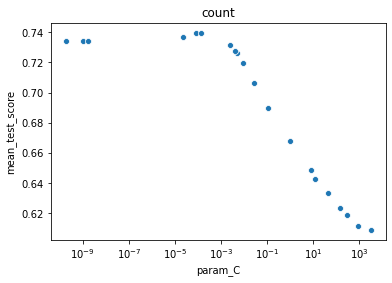

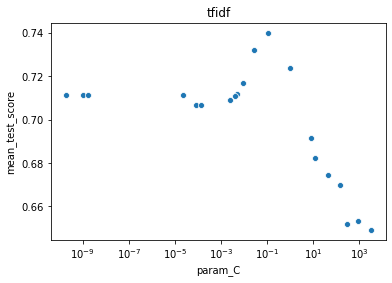

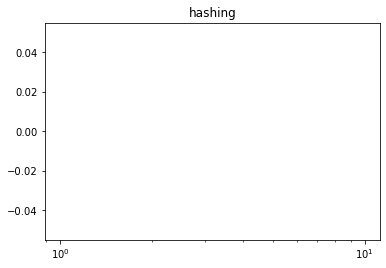

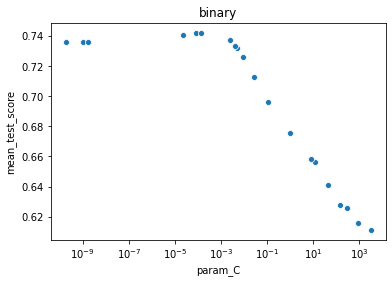

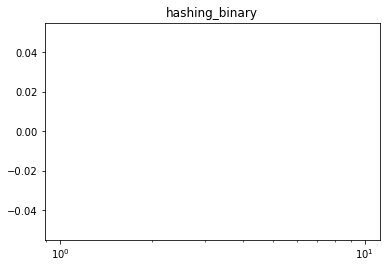

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results)
    plt.title(k)
    plt.show()

In [18]:
[f'{k}: {v.best_estimator_.C:.2e}' for k, v in cv.items()]

['count: 1.34e-04',
 'tfidf: 1.10e-01',
 'hashing: 4.82e-03',
 'binary: 1.34e-04',
 'hashing_binary: 4.82e-03']

In [ ]:
vectorizers = ['count', 'tfidf', 'hashing', 'binary', 'hashing_binary']

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
    
    lr = LogisticRegression(random_state=0)
    
    params = {'C': sp_loguniform(1e-10, 1e0),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=100,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='roc_auc',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, train_labels)
    predicted = cv[vectorizer].predict(dev)
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC: {roc_auc_score(dev_labels, predicted)}')
    print(f'AP: {average_precision_score(dev_labels, predicted)}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 17.9min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 31.8min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 33.3min finished


Vectorizer: count
ROC: 0.6824659601824518
AP: 0.1561411056103147
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 11.9min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 21.9min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 22.6min finished


Vectorizer: tfidf
ROC: 0.6927763586025801
AP: 0.16498424060330158
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 13.3min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 14.8min finished


Vectorizer: hashing
ROC: 0.5
AP: 0.101564675093268
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 17.4min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 30.7min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 32.1min finished


Vectorizer: binary
ROC: 0.6849821051408348
AP: 0.15780968628581854
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  1.0min


In [44]:
from sklearn.metrics import recall_score, precision_score

for vectorizer in vectorizers:
    if 'hashing' in vectorizer:
        continue
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
    
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    labels = dev_labels
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')
    
#     predicted = cv[vectorizer].predict_proba(train)[:,1]
    
#     labels = train_labels
    
#     print(f'Vectorizer: {vectorizer}')
#     print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
#     print(f'AP:         {average_precision_score(labels, predicted):.4f}')
#     print(f'Precision:  {precision_score(labels, predicted):.4f}')
#     print(f'Recall:     {recall_score(labels, predicted):.4f}')
#     print('')

Vectorizer: count
ROC:        0.7492
AP:         0.2328
Precision:  0.1665
Recall:     0.8410

Vectorizer: tfidf
ROC:        0.7556
AP:         0.2353
Precision:  0.1831
Recall:     0.7780

Vectorizer: binary
ROC:        0.7466
AP:         0.2274
Precision:  0.1692
Recall:     0.8314



In [41]:
predicted

array([0.53082451, 0.18717304, 0.49905742, ..., 0.5390328 , 0.03789939,
       0.34969859])

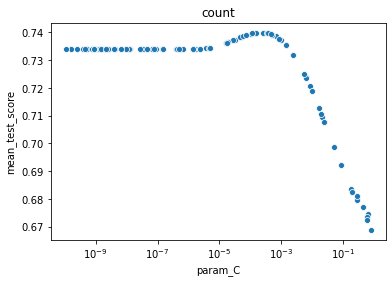

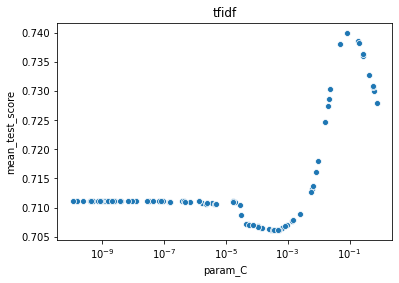

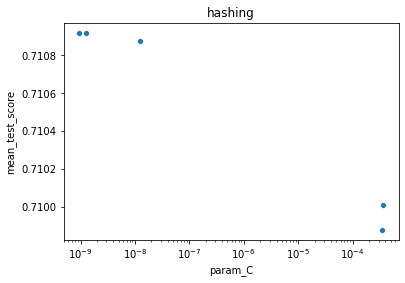

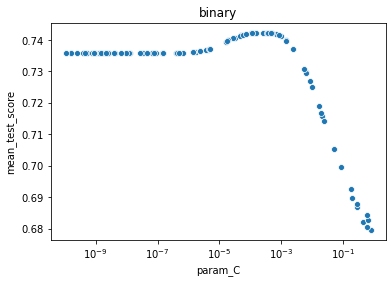

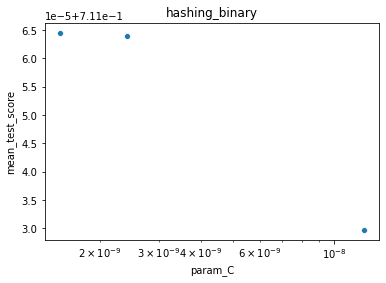

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results)
    plt.title(k)
    plt.show()

In [ ]:
vectorizers = ['count',
               'tfidf',
               # 'hashing',
               'binary',
               # 'hashing_binary',
               ]

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
    
    lr = LogisticRegression(random_state=0)
    
    params = {'C': sp_loguniform(1e-10, 1e3),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=100,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='precision',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, train_labels)
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  6.5min


In [47]:
from sklearn.metrics import recall_score, precision_score

for vectorizer in vectorizers:
    if 'hashing' in vectorizer:
        continue
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
    
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    labels = dev_labels
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')

Vectorizer: count
ROC:        0.7551
AP:         0.2374
Precision:  0.1759
Recall:     0.8158

Vectorizer: tfidf
ROC:        0.7550
AP:         0.2334
Precision:  0.2096
Recall:     0.6234

Vectorizer: binary
ROC:        0.7518
AP:         0.2343
Precision:  0.1803
Recall:     0.7881



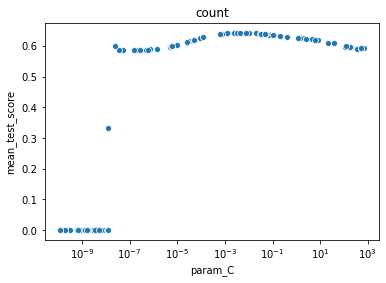

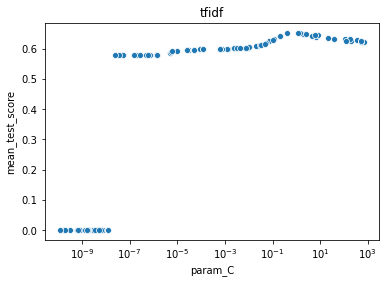

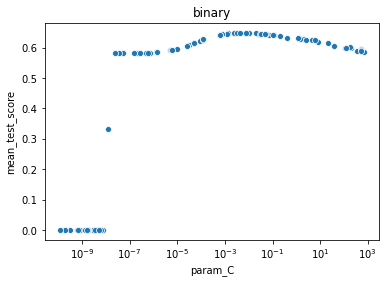

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results)
    plt.title(k)
    plt.show()

In [51]:
from sklearn.utils import shuffle

vectorizers = ['count',
               'tfidf',
               # 'hashing',
               'binary',
               # 'hashing_binary',
               ]

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
        
    train, shuffled_train_labels = shuffle(train, train_labels)
    dev, shuffled_dev_labels = shuffle(dev, dev_labels)
    
    lr = LogisticRegression(random_state=0)
    
    params = {'C': sp_loguniform(1e-10, 1e3),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=10,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='precision',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, shuffled_train_labels)
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    labels = shuffled_dev_labels
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  7.0min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: count
ROC:        0.7500
AP:         0.2303
Precision:  0.1793
Recall:     0.7870

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  5.0min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: tfidf
ROC:        0.7298
AP:         0.2173
Precision:  0.1994
Recall:     0.5556

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  6.8min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: binary
ROC:        0.7484
AP:         0.2310
Precision:  0.1809
Recall:     0.7681



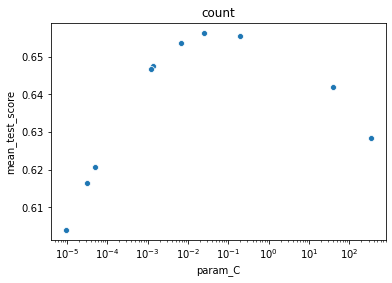

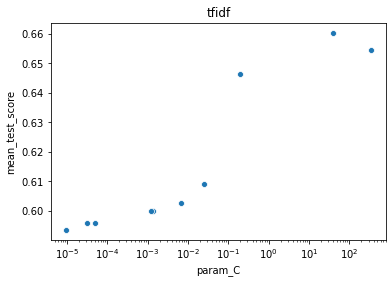

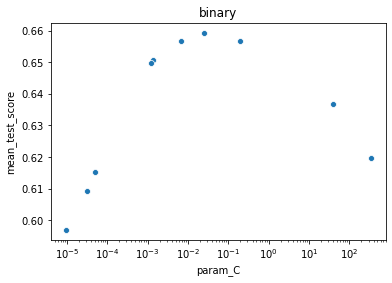

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results)
    plt.title(k)
    plt.show()

In [53]:
from sklearn.utils import shuffle

vectorizers = ['count',
               'tfidf',
               # 'hashing',
               'binary',
               # 'hashing_binary',
               ]

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
        
    train, shuffled_train_labels = shuffle(train, train_labels)
    dev, shuffled_dev_labels = shuffle(dev, dev_labels)
    
    lr = LogisticRegression(random_state=0)
    
    params = {'C': sp_loguniform(1e-10, 1e3),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=100,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='precision',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, shuffled_train_labels)
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    labels = shuffled_dev_labels
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 27.9min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 51.0min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 53.3min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: count
ROC:        0.7110
AP:         0.1967
Precision:  0.1723
Recall:     0.6933

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 20.4min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 36.2min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 38.6min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: tfidf
ROC:        0.7507
AP:         0.2298
Precision:  0.2055
Recall:     0.6198

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed: 26.7min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed: 49.6min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 51.8min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Vectorizer: binary
ROC:        0.7425
AP:         0.2266
Precision:  0.1808
Recall:     0.7453



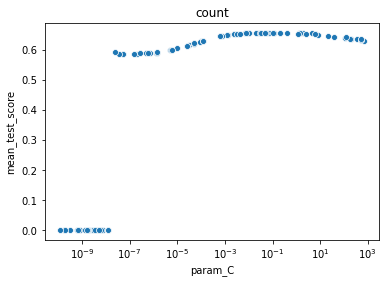

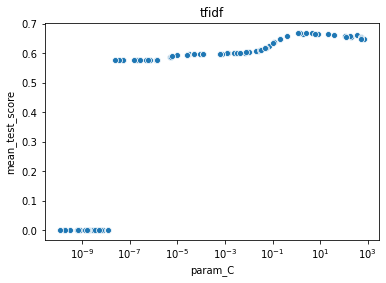

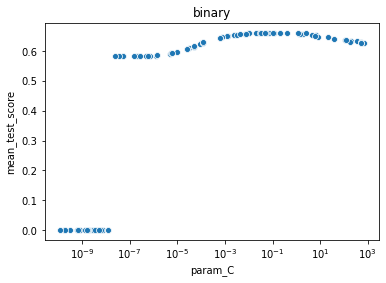

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results)
    plt.title(k)
    plt.show()

In [70]:
import numpy as np
np.abs(cv['count'].best_estimator_.coef_).sum()

160064.87083380713

In [71]:
cv['count'].best_estimator_.C

4.7088189012649

In [72]:
from scipy.stats import uniform as sp_uniform

In [80]:
vectorizers = ['count',
               'tfidf',
               # 'hashing',
               'binary',
               # 'hashing_binary',
               ]

with open('../data/train_labels.pckl', 'rb') as f:
    train_labels = pickle.load(f)
with open('../data/dev_labels.pckl', 'rb') as f:
    dev_labels = pickle.load(f)

cv = {}
    
for vectorizer in vectorizers:
    with open(f'../data/train_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        train = pickle.load(f)
    with open(f'../data/dev_{vectorizer}_downsampled_data.pckl', 'rb') as f:
        dev = pickle.load(f)
        
    train, shuffled_train_labels = shuffle(train, train_labels)
    dev, shuffled_dev_labels = shuffle(dev, dev_labels)
    
    lr = LogisticRegression(random_state=0, max_iter=10)
    
    params = {'C': sp_loguniform(1e-10, 1e3),
              'penalty': ['l2', 'l1', 'elasticnet', 'none'],
              'fit_intercept': [True, False],
              'solver': ['saga', 'lbfgs', 'liblinear'],
              'l1_ratio': sp_uniform(),
              }
    
    cv[vectorizer] = RandomizedSearchCV(lr,
                                        params,
                                        n_iter=100,
                                        n_jobs=6,
                                        cv=3,
                                        random_state=0,
                                        verbose=3,
                                        scoring='precision',
                                        return_train_score=True,
                                        pre_dispatch='n_jobs',
                                        )
    cv[vectorizer].fit(train, shuffled_train_labels)
    predicted = cv[vectorizer].predict_proba(dev)[:, 1]
    
    labels = shuffled_dev_labels
    
    print(f'Vectorizer: {vectorizer}')
    print(f'ROC:        {roc_auc_score(labels, predicted):.4f}')
    print(f'AP:         {average_precision_score(labels, predicted):.4f}')
    print(f'Precision:  {precision_score(labels, predicted.round()):.4f}')
    print(f'Recall:     {recall_score(labels, predicted.round()):.4f}')
    print('')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:   35.8s
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 33.9min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Vectorizer: count
ROC:        0.7474
AP:         0.2214
Precision:  0.1789
Recall:     0.8002

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:   32.8s
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 18.9min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
c:\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vectorizer: tfidf
ROC:        0.7398
AP:         0.2233
Precision:  0.1900
Recall:     0.6724

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:   32.5s
[Parallel(n_jobs=6)]: Done 122 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed: 34.1min finished
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

Vectorizer: binary
ROC:        0.7332
AP:         0.2095
Precision:  0.1790
Recall:     0.7374



In [ ]:
# params:
# ['param_C', 'param_fit_intercept', 'param_l1_ratio', 'param_penalty', 'param_solver']

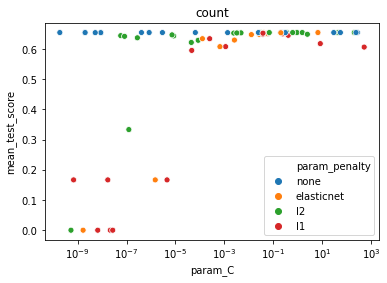

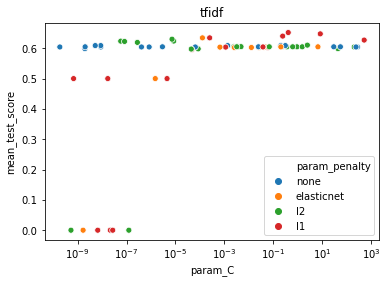

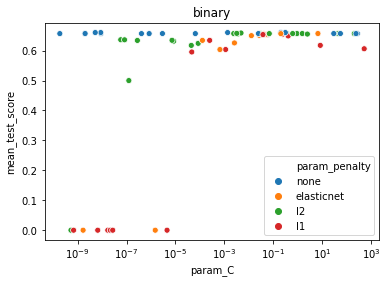

In [85]:
for k, vec in cv.items():
    results = pd.DataFrame.from_dict(vec.cv_results_)
    plt.xscale('log')
    sns.scatterplot(x='param_C', y='mean_test_score', data=results, hue='param_penalty')
    plt.title(k)
    plt.show()